HARPS spectra cover the 5598 Å TiO feature, downloading a bunch of solar spectra from [this paper’s source data](http://telbib.eso.org/detail.php?bibcode=2016A%26A...587A.103L)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [7]:
load_fits = fits.getdata('/Users/bmmorris/Downloads/ADP.2014-09-16T11:06:13.483.fits')

In [36]:
wl, fl = load_fits['WAVE'][0], load_fits['Flux'][0]/np.nanmedian(load_fits['Flux'][0])

In [31]:
from phoenix import get_any_metallicity_url, get_phoenix_model_wavelengths

In [75]:
url = get_any_metallicity_url(5800, 4.5, 0)

phoenix_sun_fl = fits.getdata(url)
phoenix_sun_fl /= np.median(phoenix_sun_fl) * 3
phoenix_sun_wl = get_phoenix_model_wavelengths()

url = get_any_metallicity_url(3800, 4.5, 0)

phoenix_spot_fl = fits.getdata(url)
phoenix_spot_fl /= np.median(phoenix_spot_fl) * 1.5
phoenix_spot_wl = get_phoenix_model_wavelengths()

(5588.41, 5608.41)

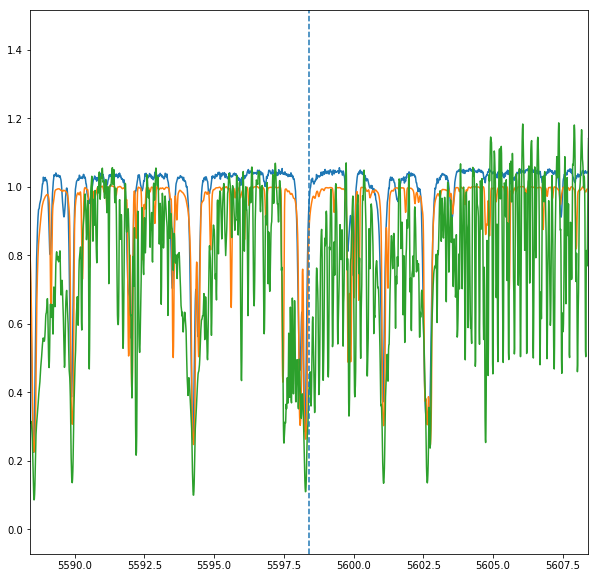

In [78]:
tio = 5598.410

dlam = 0.2

plt.figure(figsize=(10, 10))
plt.plot(wl, fl)
plt.plot(phoenix_sun_wl - dlam, phoenix_sun_fl)
plt.plot(phoenix_spot_wl - dlam, phoenix_spot_fl)

plt.axvline(tio, ls='--')
# plt.axvline(5598.410, ls='--')

plt.xlim([tio - 10, tio + 10])